# Practice 0301 - Example


## Practice
1. Read an image from file
2. Show the original image using matplotlib.pyplot!
3. For each pixel, compute its distance from image center
4. For each pixel, set weight = (360. - distance) / 360.
5. For each pixel, multiply its brightness by the weight to produce vignetting effect
6. Show the vignetting image using matplotlib.pyplot
7. Write the image to file
8. Upload your image file

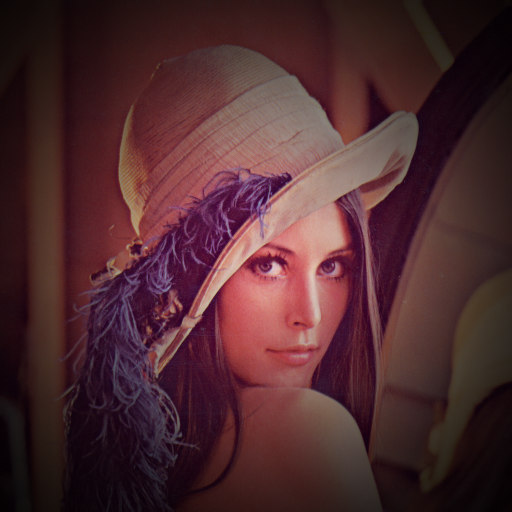

<class 'numpy.uint8'>
height, width, channel =  512 512 3
center_Y, center_X =  256 256


True

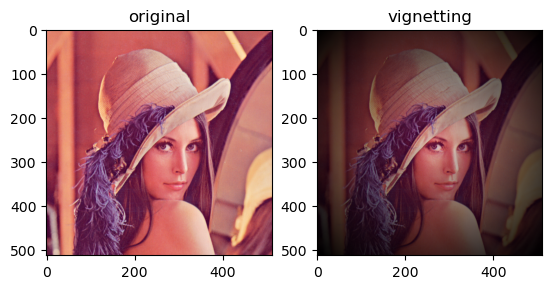

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# 讀取圖片 
# 選取檔案位置 
# Read image 
# Choise the image path
img_ori = cv2.imread('D:/Desktop/Class_Practices/Data/lena.png')
print(type(img_ori[0,0,0]))

# 圖片長寬 
# image height amd width
height, width, channel = img_ori.shape
print("height, width, channel = " , height, width, channel)


# 顏色轉換順序
# re-order color channels
# BGR 2 RGB
# BGR 換成 RGB (一般圖片顏色)
b,g,r = cv2.split(img_ori)
img_vignetting = cv2.merge([r,g,b]).copy()
#cv2.split: Splits the RGB channels into three separate channels
#cv2.merge: Merges the three RGB channels into a single image.
# cv2.split ：將 RGB 三個頻道分割
# cv2.merge ：將 RGB 三個頻道組合


# comput image center
# 計算圖片中心點
center_Y = int(height/2)
center_X = int(width/2)
print("center_Y, center_X = " , center_Y, center_X)


# comput image vignetting
# 計算圖片暈影
# abs取絕對值
# Use "abd" get the absolute value
for y in range(0 , height):
    for x in range(0  ,width):
        distance = (abs(y - center_Y)**2 + abs(x - center_X)**2) **0.5
        img_vignetting[y,x,:] = img_vignetting[y,x,:] * abs(360 - distance) / 360
        
# 方法 --> 用畢氏定理計算每個像素與中心點的距離(a平方+b平方，再開根號)
#          依照距離設定權重，再將權重乘回圖片
# Method --> Calculate the distance between each pixel and the center point using the Pythagorean theorem (square of a + square of b, then take it the square root).
# Set weights based on the distance, and multiply the weights back to the image.


# 轉換順序BGR 到 RGB 
# BGR 2 RGB
b,g,r = cv2.split(img_ori)
img_RGB = cv2.merge([r,g,b])

# show original image with matplot in the first row first cell
# 在 matplot 第一排第一格格窗中顯示圖片
plt.subplot(1,2,1)
plt.title('original')
plt.imshow(img_RGB)


# show original image with matplot in the first row second cell
# 在 matplot 第一排第二格格窗中顯示圖片
plt.subplot(1,2,2)
plt.title('vignetting')
plt.imshow(img_vignetting)


# need to re-order color channels again!
# RGB 2 BGR for openCV
# Weite the image
# 再次將 RGB 轉換回 BGR
# 將圖片寫入資料夾中
r,g,b = cv2.split(img_ori)
img_BGR = cv2.merge([b,g,r])
cv2.imwrite('Output/vignetting.png', img_vignetting)

